# IMPORTS

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
import datetime

In [5]:
from dotenv import load_dotenv
 
load_dotenv(dotenv_path='/Users/daniel/OAN/credentials/contoan/.env')

True

## FROM BIGQUERY

In [6]:
sql = """
    SELECT *
    FROM `oan-nikarit.contoan.sales`
"""

# Run a Standard SQL query using the environment's default project
df = pd.read_gbq(sql, dialect='standard')

Downloading: 100%|██████████| 834/834 [00:01<00:00, 550.84rows/s]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   client_name              827 non-null    object             
 1   order_id                 808 non-null    object             
 2   latitude                 736 non-null    float64            
 3   packHidra_total_price    834 non-null    int64              
 4   packHidra_unit_price     834 non-null    float64            
 5   subtotal_price           834 non-null    float64            
 6   longitude                736 non-null    float64            
 7   manteca_unit_price       834 non-null    float64            
 8   creation_date            834 non-null    datetime64[ns, UTC]
 9   client_gender            834 non-null    object             
 10  client_email             794 non-null    object             
 11  manteca_nb               834 non

In [8]:
df_origin = df.copy()

In [9]:
df = df[df['origin'] == 'Shopify']

In [10]:
df['creation_date']=pd.to_datetime(df['creation_date']).dt.tz_localize(None)
df_origin['creation_date']=pd.to_datetime(df_origin['creation_date']).dt.tz_localize(None)

In [11]:
df['day']=df['creation_date'].dt.day
df_origin['day']=df_origin['creation_date'].dt.day

In [12]:
df['date']=pd.to_datetime(df['creation_date'].dt.date)
df_origin['date']=pd.to_datetime(df_origin['creation_date'].dt.date)

In [13]:
df['month_day'] = (df['date'].dt.month.apply(str) + '-' +
                               df['date'].dt.day.apply(str)
                              )

df_origin['month_day'] = (df_origin['date'].dt.month.apply(str) + '-' +
                               df_origin['date'].dt.day.apply(str)
                              )

In [14]:
# date in yyyy/mm/dd format
jan =pd.to_datetime('2020-01-20').tz_localize(None)
dic = pd.to_datetime('2019-12-01').tz_localize(None)
dic2 = pd.to_datetime('2019-12-31').tz_localize(None)

In [15]:
df_study_2019 = df[ (df['creation_date'] <jan) & (dic < df['creation_date'])]

In [16]:
df_study_2019_2 = df[ (df['creation_date'] <= dic2) & (dic < df['creation_date'])]

In [17]:
# date in yyyy/mm/dd format
dic_2020 = pd.to_datetime('2020-12-01').tz_localize(None)

In [18]:
df_study_2020 = df[ (dic_2020 < df['creation_date'])]

## RESULTS 2019

In [19]:
df_study_2019.columns

Index(['client_name', 'order_id', 'latitude', 'packHidra_total_price',
       'packHidra_unit_price', 'subtotal_price', 'longitude',
       'manteca_unit_price', 'creation_date', 'client_gender', 'client_email',
       'manteca_nb', 'province', 'taxes_included', 'balsamo_total_price',
       'packHidra_nb', 'crema_total_price', 'client_last_name', 'total_price',
       'packContigo_nb', 'balsamo_unit_price', 'close_date', 'zip', 'id',
       'balsamo_nb', 'crema_nb', 'gateway', 'packContigo_total_price',
       'packContigo_unit_price', 'crema_unit_price', 'product_movement',
       'manteca_total_price', 'country', 'total_tax', 'order_status_url',
       'accounting_item', 'origin', 'client_phone', 'bolsa_total_price',
       'navidadCode', 'packBandana_unit_price', 'packBandana_nb',
       'packAbanico_unit_price', 'packAbanico_nb', 'packNavidad_nb',
       'packAbanico_total_price', 'packBandana_total_price', 'bolsa_nb',
       'city', 'bolsa_unit_price', 'client_adresse', 'packNavi

In [20]:
df_study_2019[['total_price','packHidra_nb','manteca_nb','crema_nb','balsamo_nb']].sum()

total_price     2754.0
packHidra_nb     110.0
manteca_nb        58.0
crema_nb          23.0
balsamo_nb        13.0
dtype: float64

## COMPARE

In [21]:
df_days = pd.DataFrame({'day':[i+1 for i in range(31)]})

In [22]:
df_2019 = df_study_2019_2.groupby('day')[['total_price','packHidra_nb','manteca_nb',
                                          'crema_nb','balsamo_nb']].sum().reset_index()

In [23]:
df_2019 = pd.merge(df_days,df_2019,on='day',how='left')

In [24]:
df_2019['year'] = 2019

In [25]:
df_2019.fillna(0,inplace=True)

In [26]:
df_2020 = df_study_2020.groupby('day')[['total_price','packHidra_nb','packNavidad_nb',
                 'manteca_nb','crema_nb','balsamo_nb']].sum().reset_index()

In [27]:
df_2020['packHidra_nb'] = df_2020['packNavidad_nb']+df_2020['packHidra_nb']

In [28]:
df_2020 = df_2020[['day','total_price','packHidra_nb',
                 'manteca_nb','crema_nb','balsamo_nb']]

In [29]:
df_2020 = pd.merge(df_days,df_2020,on='day',how='left')

In [30]:
df_2020['year'] = 2020

In [31]:
df_2020.fillna(0,inplace=True)

In [32]:
## APPEND BOT
df_compare2 = df_2019.append(df_2020,ignore_index=True)

In [33]:
df_compare2

,day,total_price,packHidra_nb,manteca_nb,crema_nb,balsamo_nb,year
0,1,0.0,0.0,0.0,0.0,0.0,2019
1,2,28.0,0.0,3.0,0.0,0.0,2019
2,3,82.0,1.0,3.0,0.0,0.0,2019
3,4,54.0,3.0,0.0,0.0,0.0,2019
4,5,20.0,0.0,2.0,0.0,0.0,2019
...,...,...,...,...,...,...,...
57,27,66.5,0.0,5.0,0.0,3.0,2020
58,28,239.0,9.0,2.0,1.0,0.0,2020
59,29,187.5,8.0,0.0,4.0,0.0,2020
60,30,307.0,13.0,0.0,0.0,0.0,2020


## SALES

In [34]:
(-1)**2

1

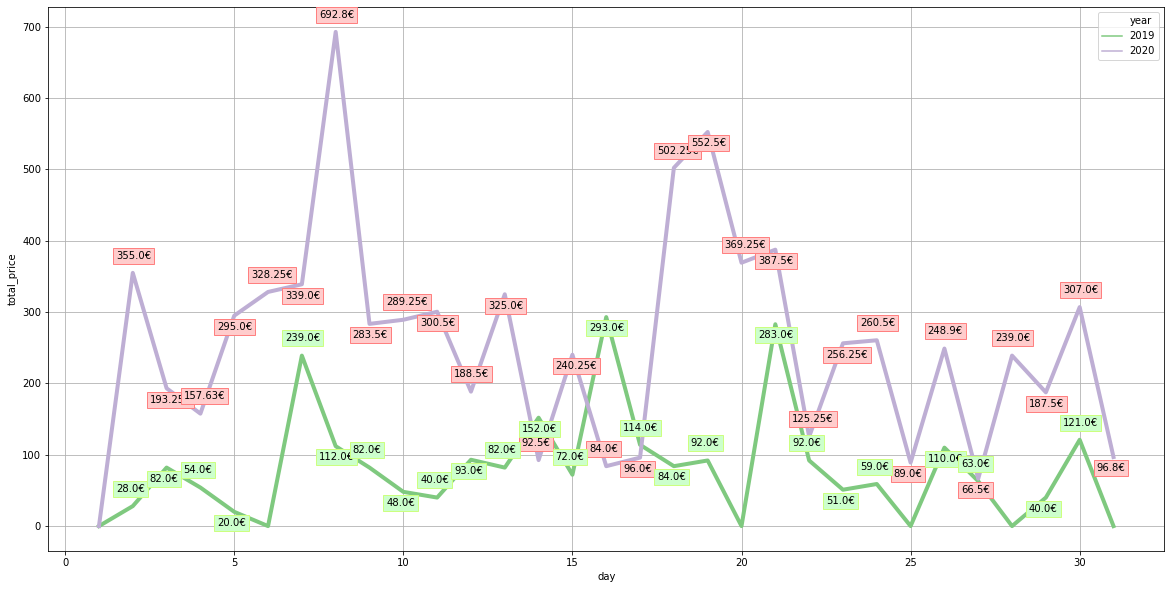

In [35]:
y='total_price'
fig = plt.figure(figsize=(20,10))

ax=fig.add_axes()
sns.lineplot(x='day',y=y,hue='year', data=df_compare2,palette='Accent',lw=4,ax=ax)

for i,ind in enumerate(df_compare2[(df_compare2['year']==2020) & ( 0 < df_compare2[y]) ].index):
    plt.text(df_compare2.loc[ind,'day']-0.5,
             df_compare2.loc[ind,y]+(-1)**i*20,
             str(df_compare2.loc[ind,y])+'€',
            bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))

for i,ind in enumerate(df_compare2[(df_compare2['year']==2019) & ( 0 < df_compare2[y]) ].index):
    plt.text(df_compare2.loc[ind,'day']-0.5,
             df_compare2.loc[ind,y]+(-1)**i*20,
             str(df_compare2.loc[ind,y])+'€',
            bbox=dict(boxstyle="square",
                   ec=(0.8, 1., 0.5),
                   fc=(0.8, 1., 0.8),
                   ))

plt.grid()
plt.show()

## PACKS

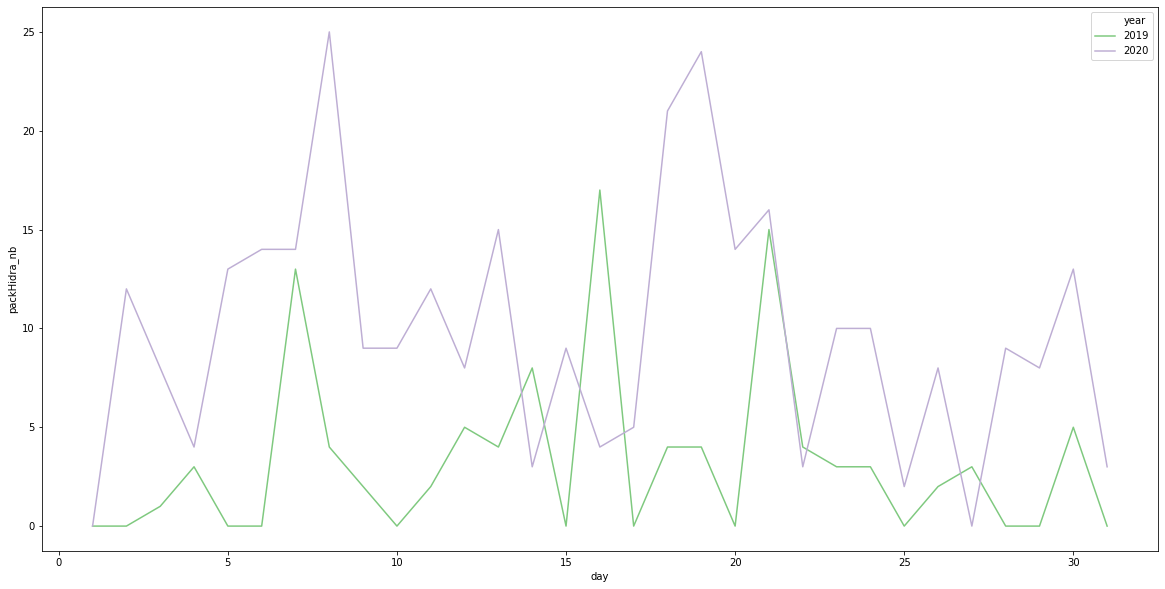

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(x='day',y='packHidra_nb',hue='year', data=df_compare2,palette='Accent')

## GROWTH

In [37]:
df_growth=pd.merge(df_2019,df_2020,on='day',how='outer',suffixes=('_2019','_2020'))

In [38]:
df_growth = df_growth[df_growth['day'] < 14]

In [39]:
cols = [a+'_2019'for a in ['total_price','packHidra_nb','manteca_nb','crema_nb','balsamo_nb']
]+[a+'_2020'for a in ['total_price','packHidra_nb','manteca_nb','crema_nb','balsamo_nb']]

In [40]:
cols.sort()

In [41]:
df_growth[cols].sum()

balsamo_nb_2019         2.00
balsamo_nb_2020        21.00
crema_nb_2019           2.00
crema_nb_2020          14.00
manteca_nb_2019        19.00
manteca_nb_2020        29.00
packHidra_nb_2019      34.00
packHidra_nb_2020     143.00
total_price_2019      880.00
total_price_2020     3747.68
dtype: float64

## agregate by date

## 2019

In [42]:
dates_2019 = pd.to_datetime(['2019-12-'+str(i+1) for i in range(31)]+['2020-01-'+str(i+1) for i in range(20)])

In [43]:
pd_days_2019 = pd.DataFrame({'date':dates_2019})

In [44]:
df_study_2019 = df_study_2019[ df_study_2019['total_price'] <200]

In [45]:
df_2019_g = df_study_2019.groupby('date')[['total_price','packHidra_nb',
                                           'manteca_nb','crema_nb','balsamo_nb']].sum().reset_index()

In [46]:
df_2019_growth = pd.merge(pd_days_2019,df_2019_g,on='date',how='left')

In [47]:
df_2019_growth.fillna(0,inplace=True)

# 2020

In [48]:
dates_2020 = pd.to_datetime(['2020-12-'+str(i+1) for i in range(31)]+['2021-01-'+str(i+1) for i in range(20)])

In [49]:
pd_days_2020 = pd.DataFrame({'date':dates_2020})

In [50]:
df_study_2020 = df_study_2020[ df_study_2020['total_price'] <200]

In [51]:
df_2020_g = df_study_2020.groupby('date')[['total_price','packHidra_nb','packNavidad_nb',
                                           'manteca_nb','crema_nb','balsamo_nb']].sum().reset_index()

In [52]:
df_2020_g['packHidra_nb'] = df_2020_g['packNavidad_nb']+df_2020_g['packHidra_nb']

In [53]:
df_2020_growth = pd.merge(pd_days_2020,df_2020_g,on='date',how='left')

In [54]:
df_2020_growth.fillna(0,inplace=True)

In [55]:
#df_2020_growth[]

### difference

In [56]:
df_2019_growth['month_day'] = (df_2019_growth['date'].dt.month.apply(str) + '-' +
                               df_2019_growth['date'].dt.day.apply(str)
                              )

In [57]:
df_2020_growth['month_day'] = (df_2020_growth['date'].dt.month.apply(str) + '-' +
                               df_2020_growth['date'].dt.day.apply(str)
                              )

In [58]:
df_diff = pd.merge(df_2019_growth,df_2020_growth,on='month_day',how='left',suffixes=('_2019','_2020'))

In [59]:
cols = ['total_price','packHidra_nb','manteca_nb','crema_nb','balsamo_nb','packNavidad_nb']

In [60]:
r = datetime.datetime.today().day

In [61]:
df_diff = df_diff[df_diff['month_day'].isin(['12-'+str(i+1) for i in range(r)])]

In [62]:
difference = dict()

### DIFFERENCE MANTECAS

In [63]:
variable = 'manteca_nb'

In [64]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).describe()

count    3.000000
mean    -2.000000
std      1.732051
min     -3.000000
25%     -3.000000
50%     -3.000000
75%     -1.500000
max      0.000000
dtype: float64

In [65]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()

-6.0

In [66]:
df_diff[variable+'_2020'].sum()

0.0

In [67]:
df_diff[variable+'_2019'].sum()

6.0

In [68]:
variable_diff = (df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()/df_diff[variable+'_2019'].sum()
variable_diff

-1.0

In [69]:
difference[variable] = 1 + variable_diff

### DIFFERENCE PACKS

In [70]:
variable = 'packHidra_nb'

In [71]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).describe()

count    3.000000
mean     1.333333
std      2.309401
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000
dtype: float64

In [72]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()

4.0

In [73]:
df_diff[variable+'_2020'].sum()

5.0

In [74]:
df_diff[variable+'_2019'].sum()

1.0

In [75]:
variable_diff = (df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()/df_diff[variable+'_2019'].sum()
variable_diff

4.0

In [76]:
difference[variable] = 1 + variable_diff

### DIFFERENCE TOTAL_SALES

In [77]:
variable = 'total_price'

In [78]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).describe()

count     3.000000
mean     15.750000
std      19.998437
min       0.000000
25%       4.500000
50%       9.000000
75%      23.625000
max      38.250000
dtype: float64

In [79]:
(df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()

47.25

In [80]:
df_diff[variable+'_2020'].sum()

157.25

In [81]:
df_diff[variable+'_2019'].sum()

110.0

In [82]:
variable_diff = (df_diff[variable+'_2020']-df_diff[variable+'_2019']).sum()/df_diff[variable+'_2019'].sum()
variable_diff

0.42954545454545456

In [83]:
difference[variable] = 1 + variable_diff

### SEEE DIFFERENCES

In [84]:
# date in yyyy/mm/dd format
jan_2019 =pd.to_datetime('2020-01-20').tz_localize(None)
dic_2019 = pd.to_datetime('2019-12-01').tz_localize(None)

dic_2020 = pd.to_datetime('2020-12-01').tz_localize(None)
jan_2020 =pd.to_datetime('2021-01-20').tz_localize(None)

In [85]:
pd_days_2019['month_day'] = pd_days_2019['date'].dt.month.apply(str) + '-' + pd_days_2019['date'].dt.day.apply(str)

In [86]:
df_plot_2019 = df[ (df['creation_date'] <= jan_2019) & (dic_2019 < df['creation_date'])].sort_values('date')

In [87]:
df_plot_2019 = df_plot_2019[cols+['month_day','date']]

In [88]:
df_plot_2019 = pd.merge(pd_days_2019,df_plot_2019,on=['month_day','date'],how='left')

In [89]:
df_plot_2019.fillna(0,inplace=True)

In [90]:
#df_2020_growth = pd.merge(pd_days,df_2020_g,on='date',how='left')

In [91]:
pd_days_2020['month_day'] = pd_days_2020['date'].dt.month.apply(str) + '-' + pd_days_2020['date'].dt.day.apply(str)

In [92]:
df_plot_2020 = df_origin[ (df_origin['creation_date'] <= jan_2020) & (dic_2020 < df_origin['creation_date'])].sort_values('date')
#df_plot_2020 = df[ (df['creation_date'] <= jan_2020) & (dic_2020 < df['creation_date'])].sort_values('date')

In [93]:
df_plot_2020 = df_plot_2020[cols+['month_day','date']]

In [94]:
df_plot_2020 = pd.merge(pd_days_2020,df_plot_2020,on=['month_day','date'],how='left')

In [95]:
df_plot_2020.fillna(0,inplace=True)

## Mantecas

In [96]:
variable = 'manteca_nb'

In [97]:
prevision = df_plot_2019[ datetime.datetime.today()+ datetime.timedelta(days=-365) < df_plot_2019['date'] ].copy()

In [98]:
prevision[variable] = prevision[variable]*difference[variable]

In [99]:
df_plot_2020_2 = df_plot_2020[df_plot_2020['date'] <= datetime.datetime.today()].append(prevision)

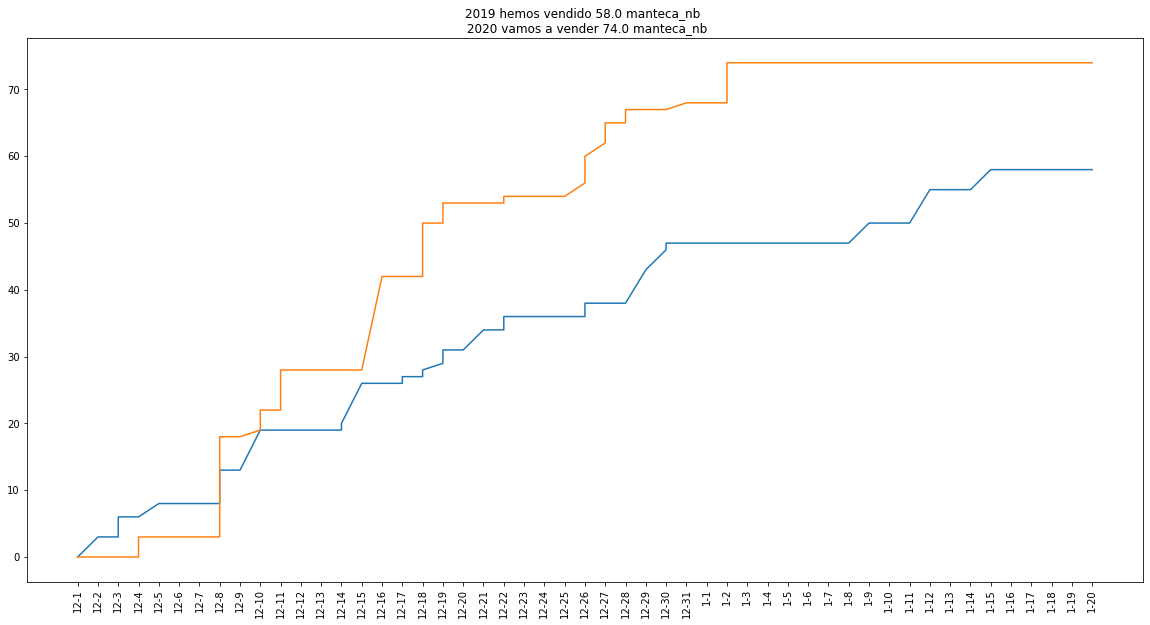

In [100]:
plt.figure(figsize=(20,10))
cum2019 = df_plot_2019[variable].cumsum()

plt.plot(df_plot_2019['month_day'], cum2019)



cum2020 = df_plot_2020_2 [variable].cumsum()
plt.plot(df_plot_2020_2['month_day'],cum2020)

plt.title('2019 hemos vendido {} {} \n 2020 vamos a vender {} {}'.format(
            df_plot_2019[variable].sum(),
            variable,
            df_plot_2020_2[variable].sum(),
            variable))

plt.xticks(rotation=90)

plt.show()

## PACKs

In [101]:
variable = 'packHidra_nb'

In [102]:
prevision = df_plot_2019[ datetime.datetime.today()+ datetime.timedelta(days=-365) < df_plot_2019['date'] ].copy()

In [103]:
prevision[variable] = prevision[variable]*difference[variable]

In [104]:
df_plot_2020_2 = df_plot_2020[df_plot_2020['date'] <= datetime.datetime.today()].append(prevision)

In [105]:
df_plot_2020_2['packHidra_nb'] = df_plot_2020_2['packHidra_nb'] + df_plot_2020_2['packNavidad_nb']

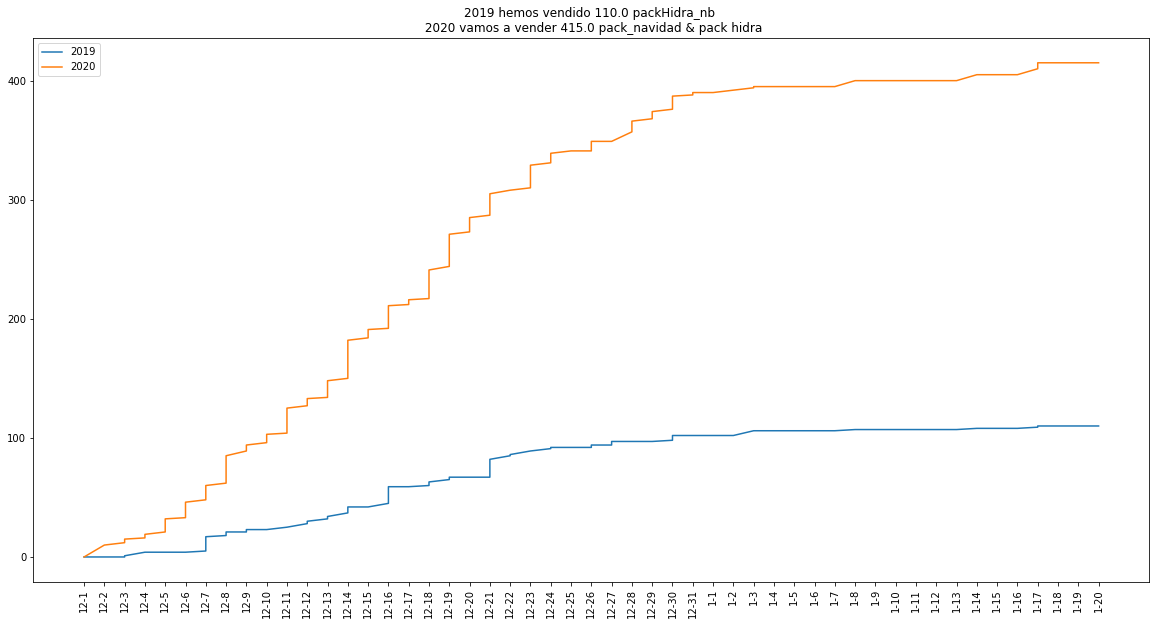

In [106]:
plt.figure(figsize=(20,10))
cum2019 = df_plot_2019[variable].cumsum()

plt.plot(df_plot_2019['month_day'], cum2019,label='2019')



cum2020 = df_plot_2020_2[variable].cumsum()
a = plt.plot(df_plot_2020_2['month_day'],cum2020,label='2020')

plt.title('2019 hemos vendido {} {} \n 2020 vamos a vender {} {}'.format(
            df_plot_2019[variable].sum(),
            variable,
            df_plot_2020_2[variable].sum(),
            'pack_navidad & pack hidra'))

plt.xticks(rotation=90)

plt.legend()

plt.show()

In [107]:
data2020 = pd.DataFrame(a[0].get_data()).T

In [108]:
data2020.columns = ['mes_dia','data']

In [109]:
data2020[(data2020['data'] < 290) & (200 < data2020['data'])]

,mes_dia,data
69,12-16,207
70,12-16,211
71,12-17,212
72,12-17,212
73,12-17,216
74,12-18,217
75,12-18,219
76,12-18,221
77,12-18,222
78,12-18,226


In [110]:
df.groupby('date')[['packHidra_nb','packNavidad_nb']].sum().reset_index()[-12:].sum()

packHidra_nb       9.0
packNavidad_nb    62.0
dtype: float64

In [111]:
200/0.79

253.1645569620253

## Mantecas

In [112]:
variable = 'total_price'

In [113]:
prevision = df_plot_2019[ datetime.datetime.today()+ datetime.timedelta(days=-365) < df_plot_2019['date'] ].copy()

In [114]:
prevision[variable] = prevision[variable]*difference[variable]

In [115]:
df_plot_2020_2 = df_plot_2020[df_plot_2020['date'] <= datetime.datetime.today()].append(prevision)

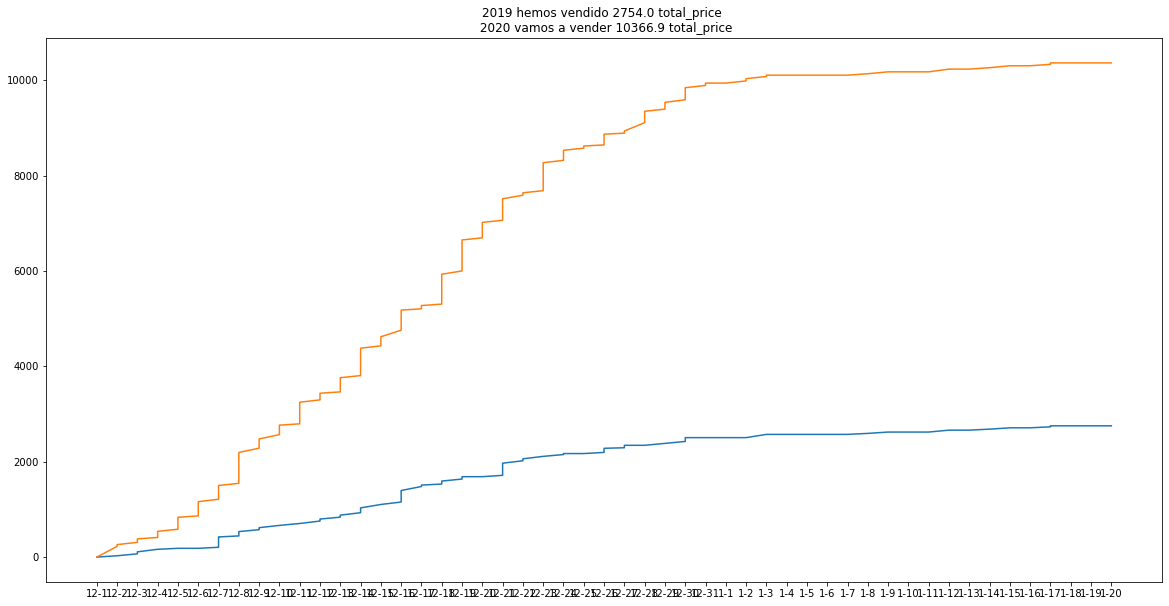

In [116]:
plt.figure(figsize=(20,10))
cum2019 = df_plot_2019[variable].cumsum()

plt.plot(df_plot_2019['month_day'], cum2019)



cum2020 = df_plot_2020_2 [variable].cumsum()
plt.plot(df_plot_2020_2['month_day'],cum2020)

plt.title('2019 hemos vendido {} {} \n 2020 vamos a vender {} {}'.format(
            df_plot_2019[variable].sum(),
            variable,
            round(df_plot_2020_2[variable].sum(),1),
            variable))

plt.show()